# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Sololearn: Learn to code** di Google Play Store. 

## 🔧 **Libraries Used**

In [2]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.sololearn')  # ID aplikasi sololearn
print("Versi terbaru:", info['version'])

Versi terbaru: 4.108.0


versi terbaru hanya 170 baris, jadi diambil berdasarkan 2 versi terakhir

In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.sololearn',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,038530e5-0837-497a-a30e-1725c589110a,Ayush Sharma,https://play-lh.googleusercontent.com/a-/ALV-U...,good,5,0,4.108.0,2025-06-17 17:33:21,None,NaT,4.108.0
1,220d179f-f67a-4d80-9c2f-5114b7b37425,Tendai Henry Muchekecha,https://play-lh.googleusercontent.com/a/ACg8oc...,Good,5,0,4.107.0,2025-06-17 16:56:45,None,NaT,4.107.0
2,7c27d02b-8d6a-4b6c-b9c9-d13b395485b3,Neeraj Sharma,https://play-lh.googleusercontent.com/a-/ALV-U...,cool,3,0,4.107.0,2025-06-17 09:53:18,None,NaT,4.107.0
3,cc7e7d93-18eb-4157-97f3-17210fb5c36f,Deborah Ogunnowo,https://play-lh.googleusercontent.com/a-/ALV-U...,good,4,0,4.105.0,2025-06-17 04:35:09,None,NaT,4.105.0
4,4e9c6d47-6bab-46d1-9347-d5ad07dec812,Ebenezer Chigozie,https://play-lh.googleusercontent.com/a-/ALV-U...,Bad 😶😶,5,0,4.89.1,2025-06-17 02:24:07,None,NaT,4.89.1
...,...,...,...,...,...,...,...,...,...,...,...
995,267b3fa1-74cd-4d7a-8908-610f09aebc2e,Amokgelang Maneli,https://play-lh.googleusercontent.com/a/ACg8oc...,it's a great app to learn and create but some ...,4,13,4.102.0,2025-03-14 05:44:19,"Hey, Thanks for your feedback. We work tireles...",2025-03-21 19:11:58,4.102.0
996,182c8ab6-f7d7-4c23-9278-855261b63dce,Jonas Ngalamulume,https://play-lh.googleusercontent.com/a-/ALV-U...,Good app,4,0,4.98.1,2025-03-13 23:09:08,"Hello,\nThanks for your four-star rating! If t...",2025-03-21 19:07:53,4.98.1
997,6c96f8fa-9f26-47d1-bca5-2b86cf391919,Chrispine Ogoti,https://play-lh.googleusercontent.com/a-/ALV-U...,Easily understandable,5,0,4.102.0,2025-03-13 22:20:13,None,NaT,4.102.0
998,b0c4f781-9c7b-48bf-8ed8-862bb695bd1b,Mohamed Emad,https://play-lh.googleusercontent.com/a-/ALV-U...,well it's a good app to learn programming i Ho...,5,0,4.101.0,2025-03-13 21:46:27,None,NaT,4.101.0


In [5]:
output_path = "../data/review_sololearn.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_sololearn.xlsx


In [6]:
# # Import data
# file_path = "../data/review_sololearn.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,good,5
1,Good,5
2,cool,3
3,good,4
4,Bad 😶😶,5
...,...,...
995,it's a great app to learn and create but some ...,4
996,Good app,4
997,Easily understandable,5
998,well it's a good app to learn programming i Ho...,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    659
4    168
1     77
3     59
2     37
Name: count, dtype: int64

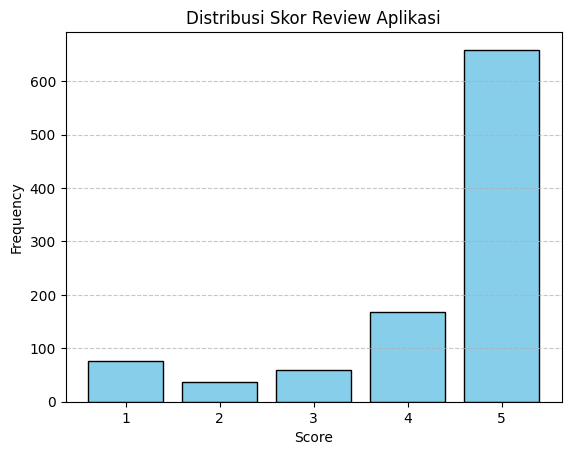

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.295000
std,1.213857
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

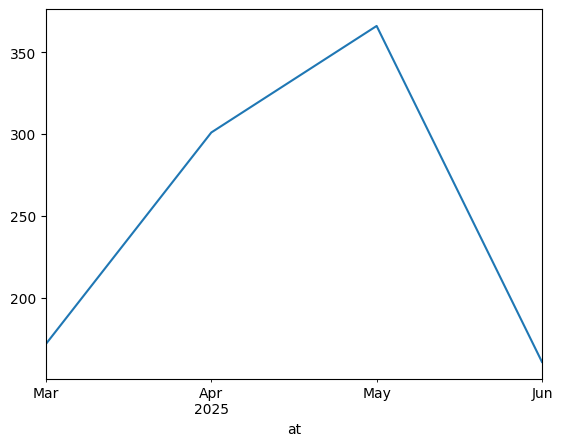

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [8]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [9]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(10)

,content,score,content_clean
0,good,5,good
1,Good,5,good
2,cool,3,cool
3,good,4,good
4,Bad 😶😶,5,bad 😶😶
5,it's very convenient to learn coding in this a...,4,it's very convenient to learn coding in this a...
6,worth it,3,worth it
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app
8,Owo .. !,5,owo .. !
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️


In [11]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(10)

,content,score,content_clean
0,good,5,good
1,Good,5,good
2,cool,3,cool
3,good,4,good
4,Bad 😶😶,5,bad 😶😶
5,it's very convenient to learn coding in this a...,4,it is very convenient to learn coding in this ...
6,worth it,3,worth it
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app
8,Owo .. !,5,owo .. !
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️


In [12]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(10)


,content,score,content_clean,tokens
0,good,5,good,[good]
1,Good,5,good,[good]
2,cool,3,cool,[cool]
3,good,4,good,[good]
4,Bad 😶😶,5,bad 😶😶,"[bad, 😶😶]"
5,it's very convenient to learn coding in this a...,4,it is very convenient to learn coding in this ...,"[it, is, very, convenient, to, learn, coding, ..."
6,worth it,3,worth it,"[worth, it]"
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app,"[uses, data, but, ai, is, the, madest, feature..."
8,Owo .. !,5,owo .. !,"[owo, .., !]"
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️,"[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]"


In [13]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [14]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [15]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(10)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,good,5,good,[good],[good],[good]
1,Good,5,good,[good],[good],[good]
2,cool,3,cool,[cool],[cool],[cool]
3,good,4,good,[good],[good],[good]
4,Bad 😶😶,5,bad 😶😶,"[bad, 😶😶]","[bad, 😶😶]",[bad]
5,it's very convenient to learn coding in this a...,4,it is very convenient to learn coding in this ...,"[it, is, very, convenient, to, learn, coding, ...","[it, is, very, convenient, to, learn, coding, ...","[convenient, learn, coding, love]"
6,worth it,3,worth it,"[worth, it]","[worth, it]",[worth]
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app,"[uses, data, but, ai, is, the, madest, feature...","[uses, data, but, ai, is, the, madest, feature...","[uses, data, ai, madest, feature]"
8,Owo .. !,5,owo .. !,"[owo, .., !]","[owo, .., !]",[owo]
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️,"[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, like]"


In [17]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(10)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,good,5,good,[good],[good],[good],[good]
1,Good,5,good,[good],[good],[good],[good]
2,cool,3,cool,[cool],[cool],[cool],[cool]
3,good,4,good,[good],[good],[good],[good]
4,Bad 😶😶,5,bad 😶😶,"[bad, 😶😶]","[bad, 😶😶]",[bad],[bad]
5,it's very convenient to learn coding in this a...,4,it is very convenient to learn coding in this ...,"[it, is, very, convenient, to, learn, coding, ...","[it, is, very, convenient, to, learn, coding, ...","[convenient, learn, coding, love]","[convenient, learn, code, love]"
6,worth it,3,worth it,"[worth, it]","[worth, it]",[worth],[worth]
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app,"[uses, data, but, ai, is, the, madest, feature...","[uses, data, but, ai, is, the, madest, feature...","[uses, data, ai, madest, feature]","[use, datum, ai, mad, feature]"
8,Owo .. !,5,owo .. !,"[owo, .., !]","[owo, .., !]",[owo],[owo]
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️,"[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, like]","[good, like]"


In [18]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head(10)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,good,5,good,[good],[good],[good],[good],[good]
1,Good,5,good,[good],[good],[good],[good],[good]
2,cool,3,cool,[cool],[cool],[cool],[cool],[cool]
3,good,4,good,[good],[good],[good],[good],[good]
4,Bad 😶😶,5,bad 😶😶,"[bad, 😶😶]","[bad, 😶😶]",[bad],[bad],[bad]
5,it's very convenient to learn coding in this a...,4,it is very convenient to learn coding in this ...,"[it, is, very, convenient, to, learn, coding, ...","[it, is, very, convenient, to, learn, coding, ...","[convenient, learn, coding, love]","[convenient, learn, code, love]","[learn, code, love]"
6,worth it,3,worth it,"[worth, it]","[worth, it]",[worth],[worth],[worth]
7,uses data but ai is the madest feature in the app,5,uses data but ai is the madest feature in the app,"[uses, data, but, ai, is, the, madest, feature...","[uses, data, but, ai, is, the, madest, feature...","[uses, data, ai, madest, feature]","[use, datum, ai, mad, feature]","[use, datum, ai, feature]"
8,Owo .. !,5,owo .. !,"[owo, .., !]","[owo, .., !]",[owo],[owo],[]
9,Good app 👌 👍 👏 I like it ... ❤️,5,good app 👌 👍 👏 i like it ... ❤️,"[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, app, 👌, 👍, 👏, i, like, it, ..., ❤️]","[good, like]","[good, like]","[good, like]"


In [19]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 964


In [20]:
df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,good,5,good,[good],[good],[good],[good],[good]
1,Good,5,good,[good],[good],[good],[good],[good]
2,cool,3,cool,[cool],[cool],[cool],[cool],[cool]
3,good,4,good,[good],[good],[good],[good],[good]
4,Bad 😶😶,5,bad 😶😶,"[bad, 😶😶]","[bad, 😶😶]",[bad],[bad],[bad]


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [24]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [25]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

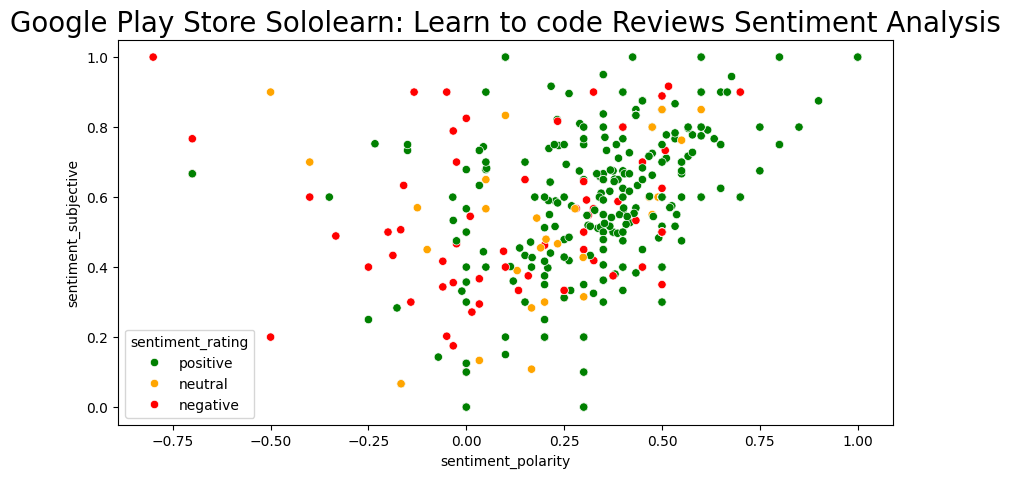

In [26]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Sololearn: Learn to code Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [27]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 798 review
- neutral : 58 review
- negative: 108 review


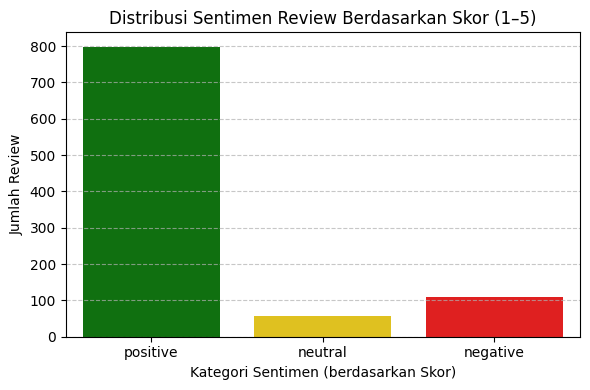

In [28]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

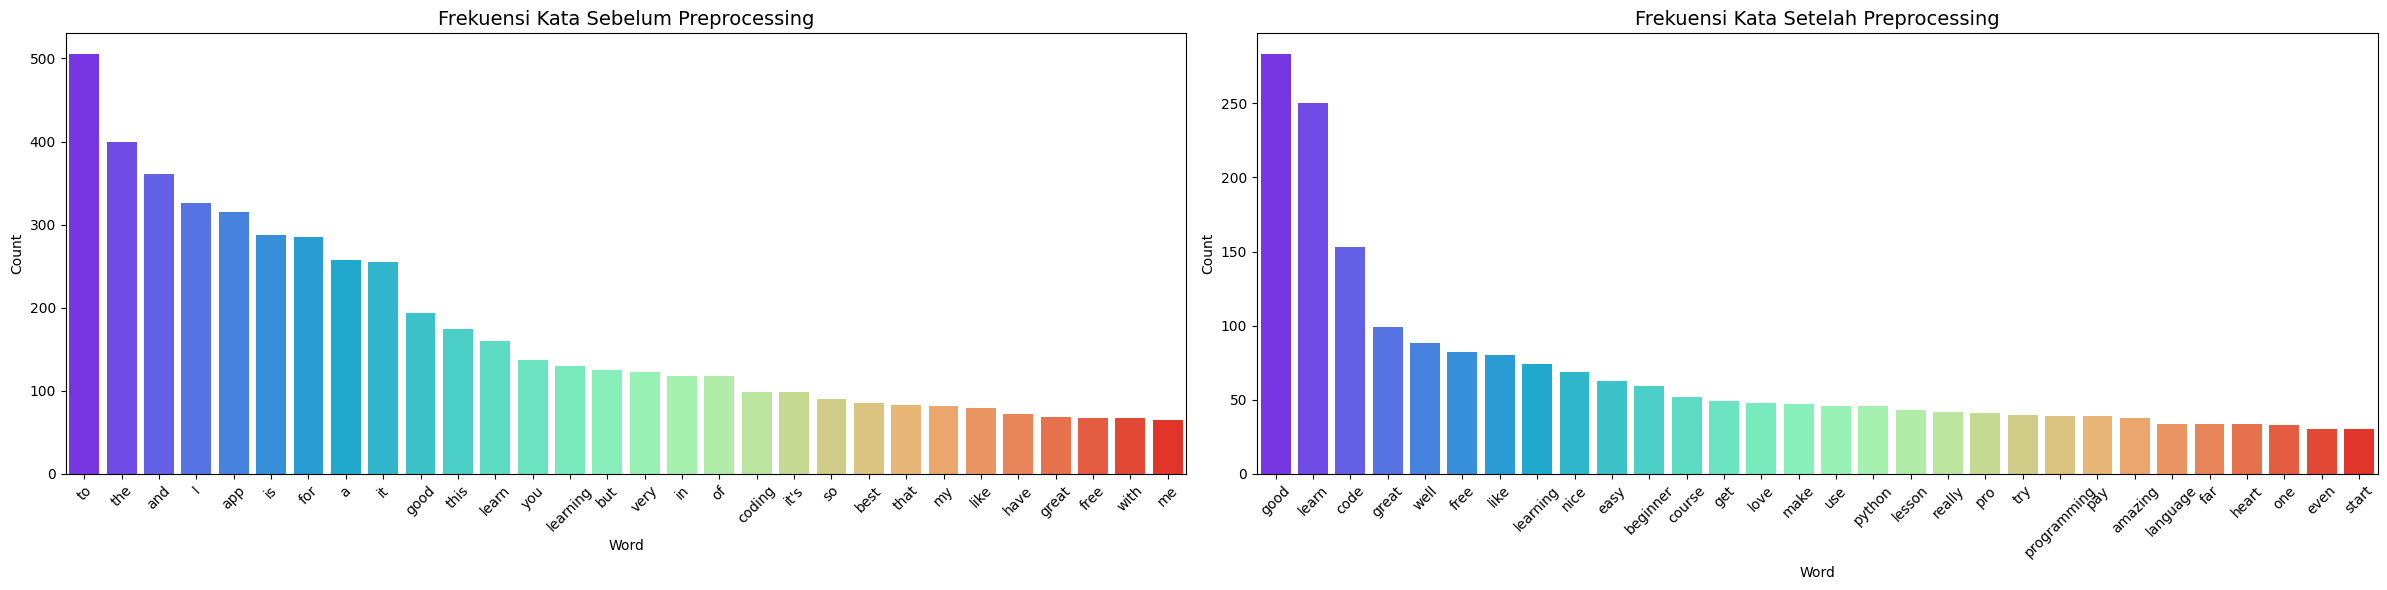

In [29]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [30]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [31]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,[good],good
1,[good],good
2,[cool],cool
3,[good],good
4,"[bad, 😶😶]",bad 😶😶


In [32]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [33]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [34]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,[good],good,0.000,0.000,1.0,0.4404,positive
1,[good],good,0.000,0.000,1.0,0.4404,positive
2,[cool],cool,0.000,0.000,1.0,0.3182,positive
3,[good],good,0.000,0.000,1.0,0.4404,positive
4,"[bad, 😶😶]",bad 😶😶,0.778,0.222,0.0,-0.5423,negative


In [35]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 816 review
- Neutral : 74 review
- Negative: 74 review


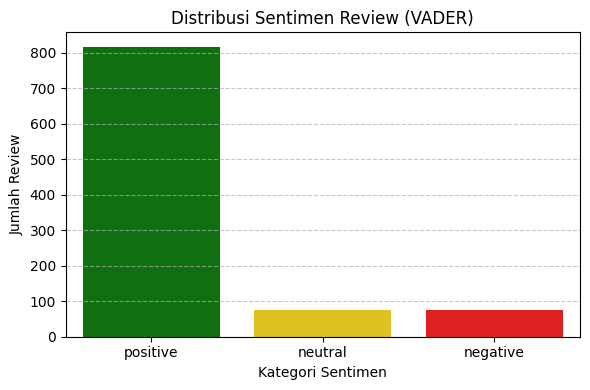

In [36]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [37]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [38]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                43       19        46
neutral                 11       11        36
positive                20       44       734


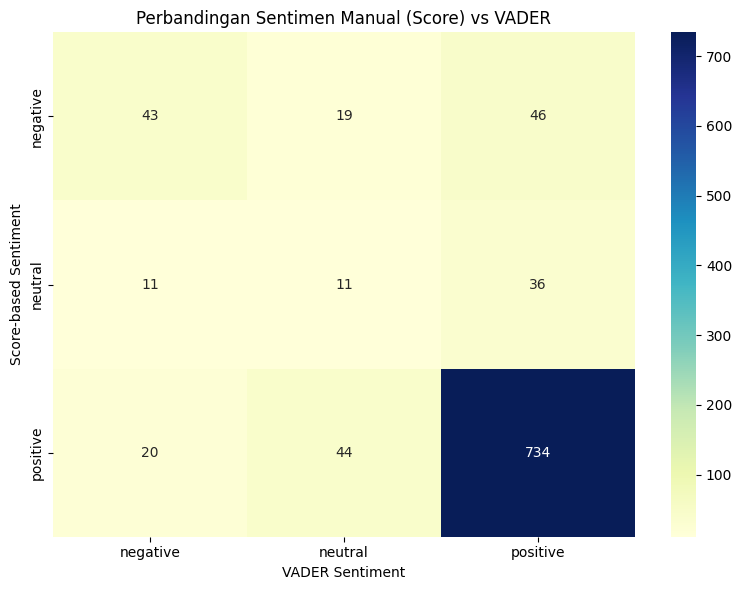

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [40]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 964
✅ Jumlah yang cocok    : 788
📊 Akurasi Kesesuaian   : 81.74%


### 6️⃣ **Topic Modelling**

In [63]:
def display_labeled_topics(model, feature_names, topic_labels=None, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        if topic_labels is not None:
            label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        else:
            label = f"Topik {topic_idx + 1}"
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))
        
# Fungsi untuk memproses dan tampilkan topik dari subset data
def topic_modeling_by_sentiment(df, label, topic_labels=None, n_topics=5, no_top_words=10):
    print(f"\n===== 🔍 Topik untuk Sentimen: {label.upper()} =====")

    df = df.copy()
    df['clean_text_final'] = df['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

    tfidf_vectorizer = TfidfVectorizer(
        max_df=0.95,
        min_df=2,
        ngram_range=(1, 2)
    )
    X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text_final'])

    nmf_model = NMF(n_components=n_topics, random_state=42)
    topic_distribution = nmf_model.fit_transform(X_tfidf)

    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels, no_top_words)

    # Tambahkan kolom dominan topik
    df['dominant_topic'] = topic_distribution.argmax(axis=1)
    df['dominant_topic_display'] = df['dominant_topic'] + 1  # 1-based

    return df



In [64]:
# Pisahkan dataset berdasarkan sentimen
df_modelling = df2[['tokens_clean_final', 'sentiment_rating']].copy()
sentiment_labels = ['positive', 'negative', 'neutral']  # Sesuaikan dengan label yang kamu pakai

In [65]:
# Jalankan topic modeling per kelompok sentimen
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]
    if not df_sentiment.empty:
        topic_modeling_by_sentiment(df_sentiment, label, n_topics=5, no_top_words=10)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1
🔑 Kata Kunci: good, good learning, learning, good beginner, beginner, good learn, far, far good, good code, good coding

🧠 Topik 2
🔑 Kata Kunci: nice, nice learn, helpful, pretty nice, pretty, heart, level, give, come, feature

🧠 Topik 3
🔑 Kata Kunci: great, learning, great learning, great learn, far, programming, free, learn platform, need, one

🧠 Topik 4
🔑 Kata Kunci: well, well learn, perfect, programming, see, free, world, well learning, learn, well free

🧠 Topik 5
🔑 Kata Kunci: learn, code, learn code, easy, love, easy learn, good learn, beginner, well learn, amazing

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1
🔑 Kata Kunci: pay, learn, heart, love, ad, nice, use, version, feel, start

🧠 Topik 2
🔑 Kata Kunci: good, code, good code, one, poor, compare, useless, lesson, duolingo, learning

🧠 Topik 3
🔑 Kata Kunci: free, ai, user, trial, free trial, require, continue, get, bank, charge

🧠 Topik 4
🔑 Kata Kunci: try, u

In [66]:
# Mapping topik ke label tematik
positive_topic_labels = {
    0: "Topik 1 - Pembelajaran Dasar yang Baik untuk Pemula",
    1: "Topik 2 - Pengalaman Menyenangkan dan Fitur yang Membantu",
    2: "Topik 3 - Platform Pembelajaran Programming yang Kuat dan Gratis",
    3: "Topik 4 - Pembelajaran yang Terstruktur dan Relevan secara Global",
    4: "Topik 5 - Kemudahan dan Kenyamanan dalam Belajar Koding"
}

negative_topic_labels = {
    0: "Topik 1 - Keluhan terhadap Iklan, Versi Gratis, dan Pengalaman Penggunaan",
    1: "Topik 2 - Ketidakpuasan terhadap Konten dan Kualitas Pembelajaran",
    2: "Topik 3 - Kritik terhadap Sistem Pembayaran dan Trial Berbayar",
    3: "Topik 4 - Masalah Teknis seperti Bug, Akses, dan Pembaruan",
    4: "Topik 5 - Kekecewaan terhadap Fitur dan Pengajaran yang Kurang Memuaskan"
}

neutral_topic_labels = {
    0: "Topik 1 - Penilaian Awal yang Cukup Positif namun Disertai Catatan",
    1: "Topik 2 - Harapan Fitur Gratis dan Kendala Teknis Penggunaan",
    2: "Topik 3 - Ketertarikan terhadap AI & Topik Lanjutan",
    3: "Topik 4 - Observasi terhadap Konten dan Struktur Pembelajaran",
    4: "Topik 5 - Catatan terhadap Fitur Berbayar dan Batasan Paywall"
}


In [67]:
# Siapkan mapping topik per sentimen
sentiment_topic_mappings = {
    'positive': positive_topic_labels,
    'negative': negative_topic_labels,
    'neutral': neutral_topic_labels
}

# Inisialisasi DataFrame akhir
final_topic_df = pd.DataFrame()

# Jalankan topic modeling per sentimen dan gabungkan hasil
for label in sentiment_labels:
    df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label].copy()
    
    if not df_sentiment.empty:
        topic_labels = sentiment_topic_mappings.get(label)
        df_with_topics = topic_modeling_by_sentiment(df_sentiment, label, topic_labels=topic_labels, n_topics=5, no_top_words=10)
        
        # Tambahkan kolom label topik tematik
        df_with_topics['jenis_topik'] = df_with_topics['dominant_topic'].map(topic_labels)

        # Gabungkan ke tabel akhir
        final_topic_df = pd.concat([final_topic_df, df_with_topics], ignore_index=True)


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pembelajaran Dasar yang Baik untuk Pemula
🔑 Kata Kunci: good, good learning, learning, good beginner, beginner, good learn, far, far good, good code, good coding

🧠 Topik 2 - Pengalaman Menyenangkan dan Fitur yang Membantu
🔑 Kata Kunci: nice, nice learn, helpful, pretty nice, pretty, heart, level, give, come, feature

🧠 Topik 3 - Platform Pembelajaran Programming yang Kuat dan Gratis
🔑 Kata Kunci: great, learning, great learning, great learn, far, programming, free, learn platform, need, one

🧠 Topik 4 - Pembelajaran yang Terstruktur dan Relevan secara Global
🔑 Kata Kunci: well, well learn, perfect, programming, see, free, world, well learning, learn, well free

🧠 Topik 5 - Kemudahan dan Kenyamanan dalam Belajar Koding
🔑 Kata Kunci: learn, code, learn code, easy, love, easy learn, good learn, beginner, well learn, amazing

===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Keluhan terhadap Iklan, Versi Gratis, dan Pengal


===== 🔍 Topik untuk Sentimen: POSITIVE =====

🧠 Topik 1 - Pembelajaran Dasar yang Baik untuk Pemula
🔑 Kata Kunci: good, good learning, learning, good beginner, beginner, good learn, far, far good, good code, good coding

🧠 Topik 2 - Pengalaman Menyenangkan dan Fitur yang Membantu
🔑 Kata Kunci: nice, nice learn, helpful, pretty nice, pretty, heart, level, give, come, feature

🧠 Topik 3 - Platform Pembelajaran Programming yang Kuat dan Gratis
🔑 Kata Kunci: great, learning, great learning, great learn, far, programming, free, learn platform, need, one

🧠 Topik 4 - Pembelajaran yang Terstruktur dan Relevan secara Global
🔑 Kata Kunci: well, well learn, perfect, programming, see, free, world, well learning, learn, well free

🧠 Topik 5 - Kemudahan dan Kenyamanan dalam Belajar Koding
🔑 Kata Kunci: learn, code, learn code, easy, love, easy learn, good learn, beginner, well learn, amazing


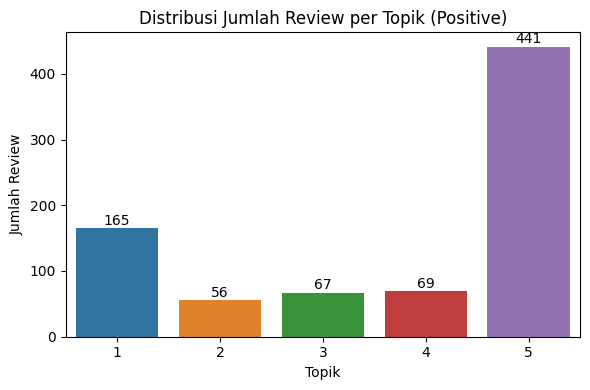

In [68]:
# Contoh: visualisasi untuk sentimen positif
label = 'positive'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=positive_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEGATIVE =====

🧠 Topik 1 - Keluhan terhadap Iklan, Versi Gratis, dan Pengalaman Penggunaan
🔑 Kata Kunci: pay, learn, heart, love, ad, nice, use, version, feel, start

🧠 Topik 2 - Ketidakpuasan terhadap Konten dan Kualitas Pembelajaran
🔑 Kata Kunci: good, code, good code, one, poor, compare, useless, lesson, duolingo, learning

🧠 Topik 3 - Kritik terhadap Sistem Pembayaran dan Trial Berbayar
🔑 Kata Kunci: free, ai, user, trial, free trial, require, continue, get, bank, charge

🧠 Topik 4 - Masalah Teknis seperti Bug, Akses, dan Pembaruan
🔑 Kata Kunci: try, update, still, without, show, even, get, open, term condition, condition

🧠 Topik 5 - Kekecewaan terhadap Fitur dan Pengajaran yang Kurang Memuaskan
🔑 Kata Kunci: like, feature, well, log, bit, like get, money, teach, even, much


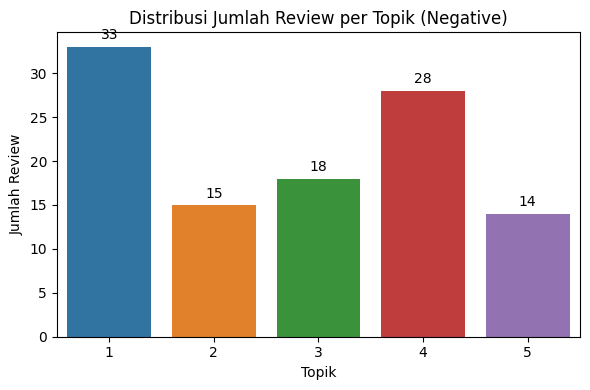

In [69]:
# Contoh: visualisasi untuk sentimen negative
label = 'negative'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=negative_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()


===== 🔍 Topik untuk Sentimen: NEUTRAL =====

🧠 Topik 1 - Penilaian Awal yang Cukup Positif namun Disertai Catatan
🔑 Kata Kunci: good, free, pretty, pretty good, interested, system, lesson need, course, good start, pay

🧠 Topik 2 - Harapan Fitur Gratis dan Kendala Teknis Penggunaan
🔑 Kata Kunci: pro, code, run, pay, try, want, wish, behind, get, problem

🧠 Topik 3 - Ketertarikan terhadap AI & Topik Lanjutan
🔑 Kata Kunci: great, learning, topic, user, really, interested, thing, ai, subscription, heart

🧠 Topik 4 - Observasi terhadap Konten dan Struktur Pembelajaran
🔑 Kata Kunci: course, learning, need, lesson, free, use, start, practice, ai, programming

🧠 Topik 5 - Catatan terhadap Fitur Berbayar dan Batasan Paywall
🔑 Kata Kunci: cool, ai, paywall, behind paywall, pay, request, pro get, back, several, behind


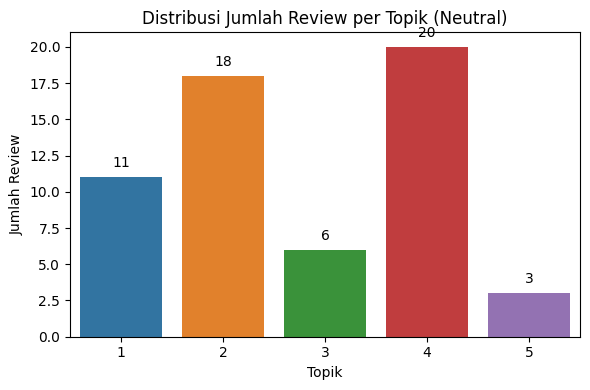

In [70]:
# Contoh: visualisasi untuk sentimen negative
label = 'neutral'
df_sentiment = df_modelling[df_modelling['sentiment_rating'] == label]

if not df_sentiment.empty:
    df_with_topic = topic_modeling_by_sentiment(
        df_sentiment,
        label,
        topic_labels=neutral_topic_labels,
        n_topics=5,
        no_top_words=10
    )

    # Plot distribusi topik
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        x='dominant_topic_display',
        hue='dominant_topic_display',
        data=df_with_topic,
        palette='tab10',
        legend=False
    )
    plt.title(f"Distribusi Jumlah Review per Topik ({label.capitalize()})")
    plt.xlabel("Topik")
    plt.ylabel("Jumlah Review")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Tambahkan label jumlah di atas batang
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 0.5,
                s=f'{int(height)}',
                ha='center',
                va='bottom'
            )

    plt.show()

In [71]:
final_topic_df.head()

,tokens_clean_final,sentiment_rating,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,[good],positive,good,0,1,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
1,[good],positive,good,0,1,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
2,[good],positive,good,0,1,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
3,[bad],positive,bad,3,4,Topik 4 - Pembelajaran yang Terstruktur dan Re...
4,"[learn, code, love]",positive,learn code love,4,5,Topik 5 - Kemudahan dan Kenyamanan dalam Belaj...


### 7️⃣ **Penggabungan Data Hasil Review**

In [72]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    final_topic_df[['jenis_topik']].reset_index(drop=True)
], axis=1)

In [73]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik
0,good,5,positive,positive,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
1,Good,5,positive,positive,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
2,cool,3,neutral,positive,Topik 1 - Pembelajaran Dasar yang Baik untuk P...
3,good,4,positive,positive,Topik 4 - Pembelajaran yang Terstruktur dan Re...
4,Bad 😶😶,5,positive,negative,Topik 5 - Kemudahan dan Kenyamanan dalam Belaj...


In [74]:
output_path = "../data/review_final_sololearn.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_sololearn.xlsx
